
#### Problemas del libro Reinforcement Learning: An Introduction de Richard S. Sutton and Andrew G. Barto. La biblia del aprendizaje por refuerzo. Publicado bajo un acuerdo de open access, por lo que el libro está disponible en forma gratuita por los autores.

# Windy Gridworld

En este problema un agente debe recorrer una cuadrícula donde existen corrientes de viento que lo empujan en una dirección por lo cual se debe encontrar el camino optimo para llegar a la meta.

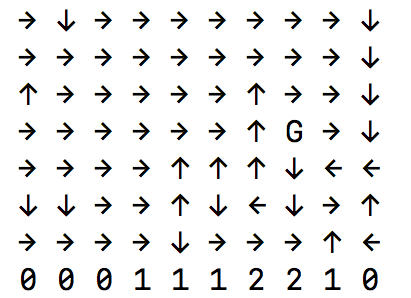

# Entorno
El agente se encuentra en una cuadrícula de 10x7 cuadros. En las cuadriculas se encuentran corrientes de aire la cual dificultan el camino del agente.

El agente comienza en la coordenada $(1, 4)$ y debe dirigirse lo más pronto posible a la meta ubicada en la coordenada $(8, 4)$. En cualquier coordenada puede decidir moverse en las 4 direcciones cardinales.

In [52]:
WORLD_HEIGHT = 7
WORLD_WIDTH = 10
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

ACTION_UP = 1
ACTION_DOWN = 2
ACTION_LEFT = 3
ACTION_RIGHT = 4

EPSILON = 0.1
ALPHA = 0.5
REWARD = -1.0

START  = [4, 1]
GOAL  = [4, 8]
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [53]:
function step(state, action)
    i, j = state
    
    if action == ACTION_UP
        return [max(i - 1 - WIND[j], 1), j]
    elseif action == ACTION_DOWN
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT), 1), j]
    elseif action == ACTION_LEFT
        return [max(i - WIND[j], 1), max(j - 1, 1)]
    elseif action == ACTION_RIGHT
        return [max(i - WIND[j], 1), min(j + 1, WORLD_WIDTH)]
    end
end

step (generic function with 1 method)

In [54]:
function episode(q_value)
    time_ = 0
    state = START 

    if rand(Binomial(1, EPSILON)) == 1
        action = rand(ACTIONS)
    else
        values_ = q_value[state[1], state[2], :]
        action = rand([action_ for (action_, value_) in enumerate(values_) if value_ == maximum(values_)])
    end

    while state != GOAL 
        next_state = step(state, action)
        
        if rand(Binomial(1, EPSILON)) == 1
            next_action = rand(ACTIONS)
        else
            values_ = q_value[next_state[1], next_state[2], :]
            next_action = rand([action_ for (action_, value_) in enumerate(values_) if value_ == maximum(values_)])
        end
        
        # Sarsa update
        q_value[state[1], state[2], action] += 
            ALPHA * (reward + q_value[next_state[1], next_state[2], next_action] -
                         q_value[state[1], state[2], action])
        state = next_state
        action = next_action
        time_ += 1
    end
    
    return time_
end

episode (generic function with 1 method)

In [55]:
q_value = zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
episode_limit = 500

steps = []
ep = 0

while ep < episode_limit
    append!(steps, episode(q_value))
    ep += 1
end

steps = accumulate(+, steps)

500-element Array{Any,1}:
  1002
  1091
  1296
  1753
  1779
  1915
  2005
  2096
  2228
  2380
  2410
  2482
  2537
     ⋮
 14705
 14726
 14743
 14760
 14780
 14800
 14820
 14837
 14853
 14871
 14888
 14938

### Resultados

In [56]:
optimal_policy = []
for i in range(1, WORLD_HEIGHT)
    push!(optimal_policy, [])
    
    for j in range(1, WORLD_WIDTH)
        if [i, j] == GOAL 
            append!(optimal_policy[end],"G")
            continue
        end
        
        bestAction = argmax(q_value[i, j, :])
        
        if bestAction == ACTION_UP
            append!(optimal_policy[end], "↑")
        elseif bestAction == ACTION_DOWN
            append!(optimal_policy[end], "↓")
        elseif bestAction == ACTION_LEFT
            append!(optimal_policy[end], "←")
        elseif bestAction == ACTION_RIGHT
            append!(optimal_policy[end], "→")
        end
    end
end

println("Optimal policy:")
for row in optimal_policy
    println(row)
end

Optimal policy:
Any['→', '→', '→', '→', '→', '→', '→', '→', '→', '↓']
Any['↑', '→', '→', '→', '→', '→', '→', '→', '→', '↓']
Any['↑', '→', '→', '→', '→', '→', '→', '←', '→', '↓']
Any['→', '→', '→', '→', '→', '→', '→', 'G', '→', '↓']
Any['→', '→', '→', '→', '→', '→', '↑', '↓', '←', '←']
Any['→', '→', '→', '→', '→', '↑', '↑', '↓', '←', '←']
Any['→', '→', '→', '→', '↑', '↑', '↑', '↑', '↓', '↓']
